iterazione 1 - w0: 0.000 b0: 0.000 - loss:14.956521739130435
iterazione 2 - w0: 0.010 b0: 0.000 - loss:14.613639130434782
iterazione 3 - w0: 0.020 b0: 0.000 - loss:14.275426086956523
iterazione 4 - w0: 0.030 b0: 0.000 - loss:13.941882608695652
iterazione 5 - w0: 0.040 b0: 0.000 - loss:13.613008695652173
iterazione 6 - w0: 0.050 b0: 0.000 - loss:13.288804347826087
iterazione 7 - w0: 0.060 b0: 0.000 - loss:12.969269565217392
iterazione 8 - w0: 0.070 b0: 0.000 - loss:12.654404347826086
iterazione 9 - w0: 0.080 b0: 0.000 - loss:12.344208695652172
iterazione 10 - w0: 0.090 b0: 0.000 - loss:12.038682608695652
iterazione 11 - w0: 0.100 b0: 0.000 - loss:11.737826086956522
iterazione 12 - w0: 0.110 b0: 0.000 - loss:11.441639130434782
iterazione 13 - w0: 0.120 b0: 0.000 - loss:11.150121739130435
iterazione 14 - w0: 0.130 b0: 0.000 - loss:10.86327391304348
iterazione 15 - w0: 0.140 b0: 0.000 - loss:10.58109565217391
iterazione 16 - w0: 0.150 b0: 0.000 - loss:10.30358695652174
iterazione 17 - w0: 

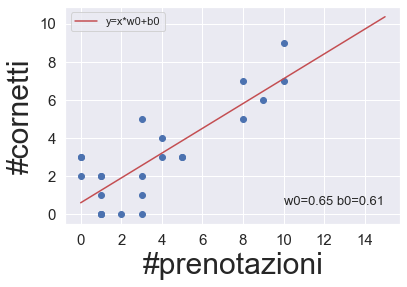

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def prediction(X,w,b): 
    return X*w+b

def loss(X,Y,w,b):
    error=prediction(X,w,b) - Y
    squared_error = error**2
    return np.average(squared_error)

def training(X,Y,iteration,learning_rate):
    w,b =0,0
    for i in range(iteration):
        current_loss = loss(X,Y,w,b)
        print(f"iterazione {i+1} - w0: {w:2.3f} b0: {b:2.3f} - loss:{current_loss}")
        if(loss(X,Y,w+learning_rate,b)<current_loss): #aumento l'inclinazione
            w+=learning_rate
        elif(loss(X,Y,w-learning_rate,b)<current_loss): #diminuisco l'inclinazione
            w-=learning_rate
        elif(loss(X,Y,w,b+learning_rate)<current_loss): #traslo la retta più SU
            b+=learning_rate
        elif(loss(X,Y,w,b-learning_rate)<current_loss): #traslo la retta più GIU'
            b-=learning_rate
        else:
            return w,b
    
    raise Exception(f"Non sono riuscito a convergere con {iteration} iterazioni")
        
        
# carico il training set 
X,Y = np.loadtxt("training_set_cornetti.txt",skiprows=1,unpack=True)

# avvio il training
w0,b0= training(X,Y,1000,0.01)
print(f"\nRISULTATO DEL TRAINING:")
print(f"w0:{w0:2.3} + b0:{b0:2.3}")

# disegno il training set 
#plt.figure(figsize=(10,10))
plt.xlabel("#prenotazioni",fontsize=30)
plt.ylabel("#cornetti",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(X, Y, "bo")

# disegno la linea che meglio approssima i dati di predizione 
axis_x=[0,15]
axis_y=[b0,prediction(axis_x[1],w0,b0)]
plt.plot(axis_x, axis_y, '-r', label=f"y=x*w0+b0")
plt.text(10,0.5,f"w0={w0:2.3} b0={b0:2.3}",fontsize=13)
plt.legend(loc='upper left')
plt.show()